# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('05-x_train-RAVDESS-SINRUIDOSEXTREMOS-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('05-x_test-RAVDESS-SINRUIDOSEXTREMOS-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('05-y_train-RAVDESS-SINRUIDOSEXTREMOS-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('05-y_test-RAVDESS-SINRUIDOSEXTREMOS-dato_audioopensmile.xlsx',index_col=0)


# **BALANCEO DE DATOS**

In [3]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [4]:
overs = RandomOverSampler()

In [5]:
overs.fit(x_train, y_train)
x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

In [6]:
y_t_overs

,Emociones
0,1
1,3
2,3
3,3
4,3
...,...
579,3
580,3
581,3
582,3


# **NORMALIZACION DE CARACTERISTICAS**

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_t_overs)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [8]:
x_train_std

array([[-0.57865101,  0.20944973, -0.57204541, ...,  1.14260783,
         0.02161405,  1.38240369],
       [-0.90613347, -1.40991969,  1.46239058, ..., -0.09280055,
         0.02998231, -1.73945172],
       [ 0.29992226,  0.70350728, -0.82184895, ...,  1.21045407,
        -0.89780779,  1.17279212],
       ...,
       [-0.63622736, -0.76649838,  0.92216191, ...,  0.19351242,
         0.28858441,  0.34942285],
       [-0.38278774, -0.71008848,  1.0667026 , ..., -0.43701694,
         0.77829492, -0.31532026],
       [-0.85097895, -1.0640309 ,  0.98765692, ..., -1.43815299,
         0.08045304, -1.30046425]])

In [9]:
y_t_overs

,Emociones
0,1
1,3
2,3
3,3
4,3
...,...
579,3
580,3
581,3
582,3


# **MODELO DE MARCHINE LEARNING**

In [10]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               13312     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 83,236
Trainable params: 83,236
Non-trainable params: 0
_________________________________________________________________


In [11]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_t_overs)
#y_test = to_categorical(y_test)

clf.fit(x_train_std, y_t_Categorical , epochs=800)
y_predict = clf.predict(x_test_std)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I

Epoch 1/800
19/19 [==============================] - 1s 4ms/step - loss: 1.1385 - accuracy: 0.5188
Epoch 2/800
19/19 [==============================] - 0s 5ms/step - loss: 0.8584 - accuracy: 0.6524
Epoch 3/800
19/19 [==============================] - 0s 4ms/step - loss: 0.7540 - accuracy: 0.6815
Epoch 4/800
19/19 [==============================] - 0s 4ms/step - loss: 0.6402 - accuracy: 0.7500
Epoch 5/800
19/19 [==============================] - 0s 3ms/step - loss: 0.5761 - accuracy: 0.7671
Epoch 6/800
19/19 [==============================] - 0s 4ms/step - loss: 0.5145 - accuracy: 0.8134
Epoch 7/800
19/19 [==============================] - 0s 4ms/step - loss: 0.4376 - accuracy: 0.8510
Epoch 8/800
19/19 [==============================] - 0s 4ms/step - loss: 0.4080 - accuracy: 0.8493
Epoch 9/800
19/19 [==============================] - 0s 4ms/step - loss: 0.3859 - accuracy: 0.8562
Epoch 10/800
19/19 [==============================] - 0s 4ms/step - loss: 0.3459 - accuracy: 0.8699
Epoch 11/

array([3, 0, 1, 0, 2, 3, 0, 3, 3, 1, 1, 3, 0, 3, 1, 1, 3, 0, 0, 0, 2, 1,
       0, 3, 3, 0, 3, 1, 1, 1, 1, 0, 2, 0, 3, 0, 0, 3, 0, 2, 0, 1, 0, 0,
       0, 3, 0, 0, 2, 0, 1, 1, 0, 3, 1, 0, 3, 0, 1, 1, 1, 1, 3, 3, 1, 0,
       1, 3, 1, 3, 0, 2, 2, 0, 3, 0, 3, 0, 3, 3, 1, 0, 3, 3, 1, 2, 1, 2,
       1, 1, 3, 3, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 3, 1, 3, 3, 3, 0, 3, 3,
       0, 0, 1, 3, 1, 1, 2, 0, 0, 2, 0, 3, 3])

# **EVALUACION**

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83        39
           1       0.65      0.73      0.69        30
           2       0.42      0.45      0.43        11
           3       0.81      0.67      0.73        43

    accuracy                           0.72       123
   macro avg       0.67      0.68      0.67       123
weighted avg       0.73      0.72      0.72       123



In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.80      0.85      0.83        39
           1       0.65      0.73      0.69        30
           2       0.42      0.45      0.43        11
           3       0.81      0.67      0.73        43

    accuracy                           0.72       123
   macro avg       0.67      0.68      0.67       123
weighted avg       0.73      0.72      0.72       123

Matriz de confusión, sin normalización
[[33  3  2  1]
 [ 4 22  0  4]
 [ 1  3  5  2]
 [ 3  6  5 29]]


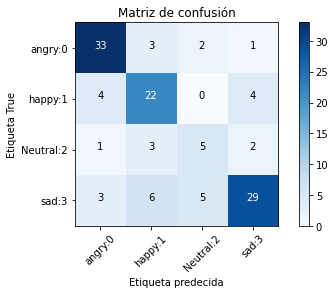

In [14]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')